In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv(r"C:\Users\pminh\OneDrive\Documents\Classes\Fall 24\STA160 DATA\merged_output.csv")
#data = data.select_dtypes(include=['float64', 'int64'])

#removing outlisers
data = data[~data["City"].isin(["Los Angeles", "Long Beach"])]


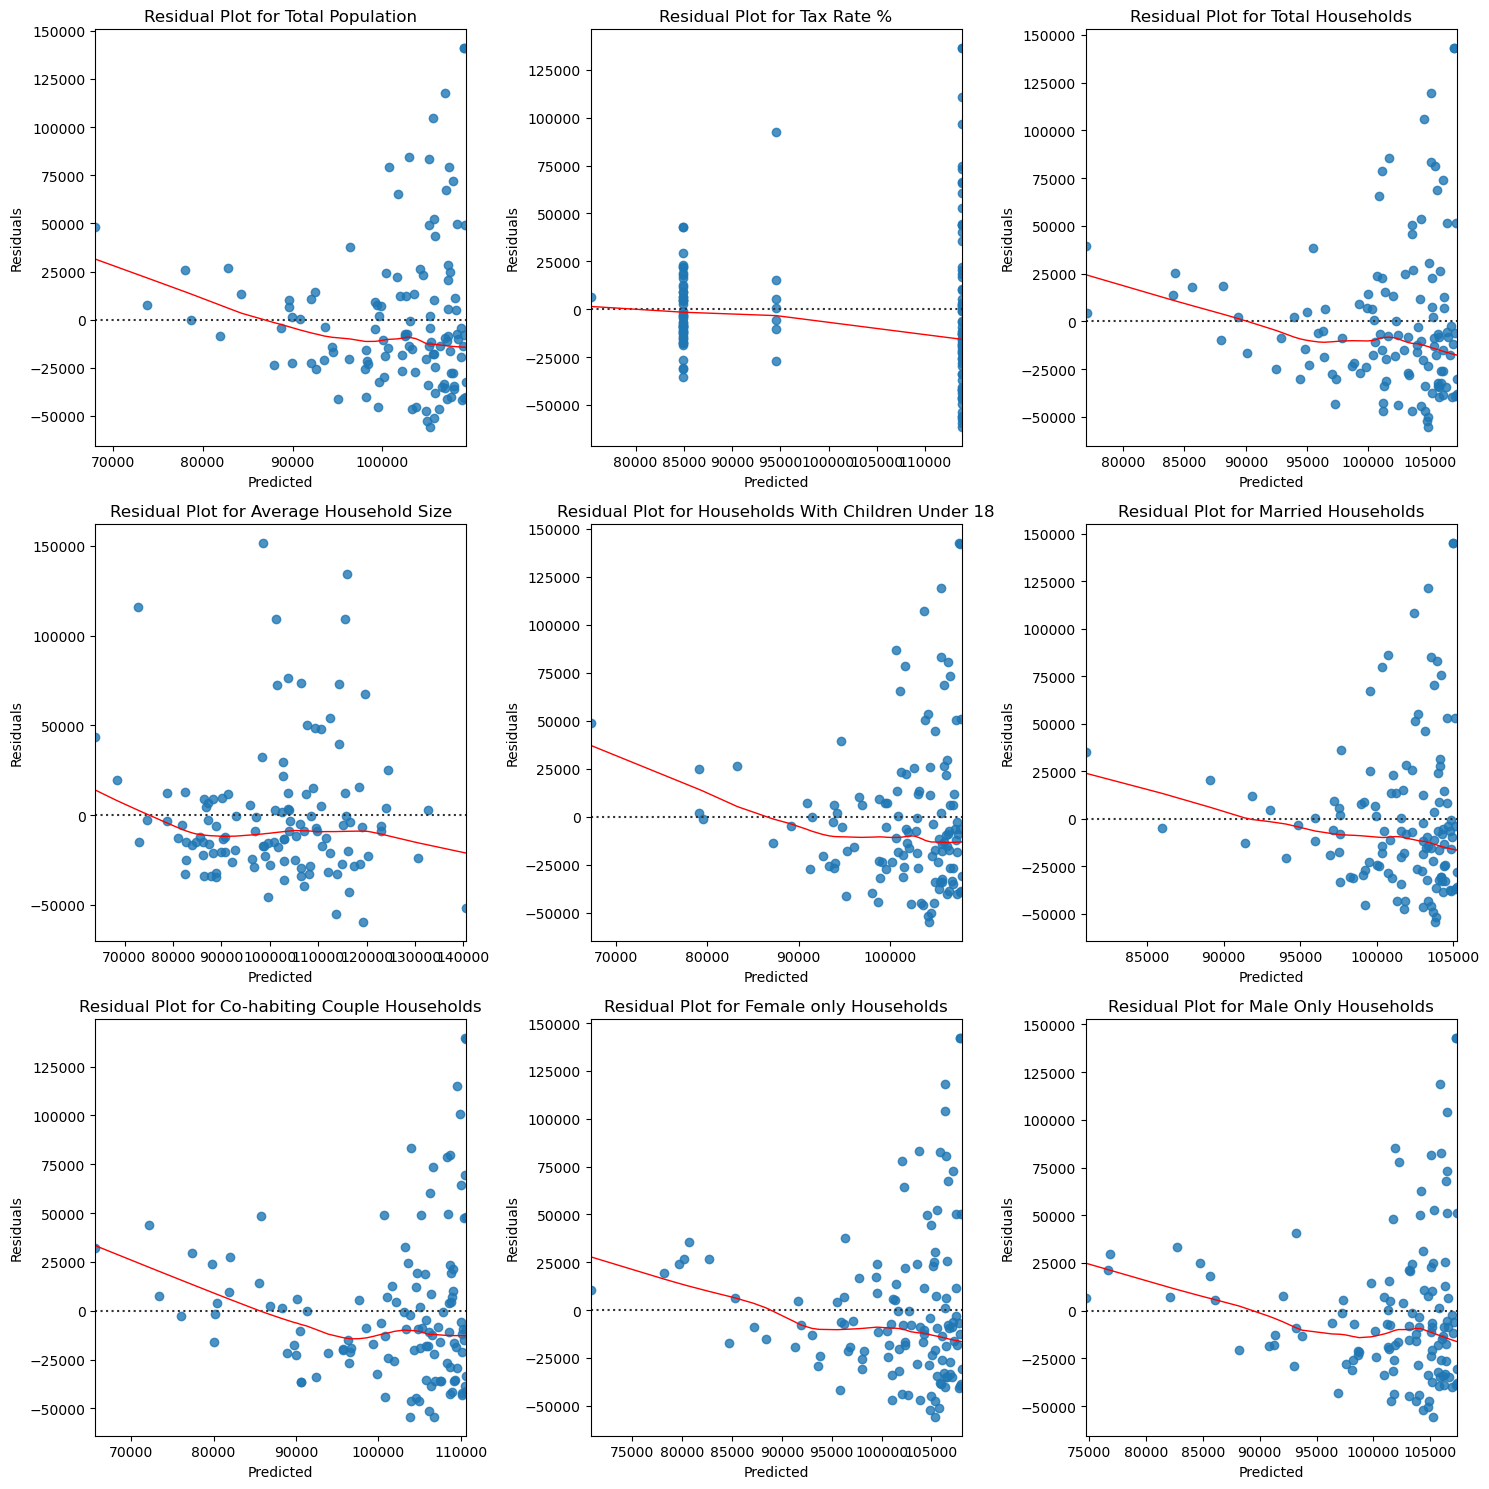

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load your data
# Extract the target variable
y = data['Median Income']

# Initialize the plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# List of features to plot
features = ['Total Population', 'Tax Rate %', 'Total Households', 'Average Household Size', 
            'Households With Children Under 18', 'Married Households', 'Co-habiting Couple Households', 
            'Female only Households', 'Male Only Households']

# Loop through each feature and create residual plots
for i, feature in enumerate(features):
    X = data[[feature]]
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict the target variable
    y_pred = model.predict(X)
    
    # Calculate residuals
    residuals = y - y_pred
    
    # Create residual plot
    sns.residplot(x=y_pred, y=residuals, lowess=True, ax=axes[i//3, i%3], line_kws={'color': 'red', 'lw': 1})
    axes[i//3, i%3].set_title(f'Residual Plot for {feature}')
    axes[i//3, i%3].set_xlabel('Predicted')
    axes[i//3, i%3].set_ylabel('Residuals')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

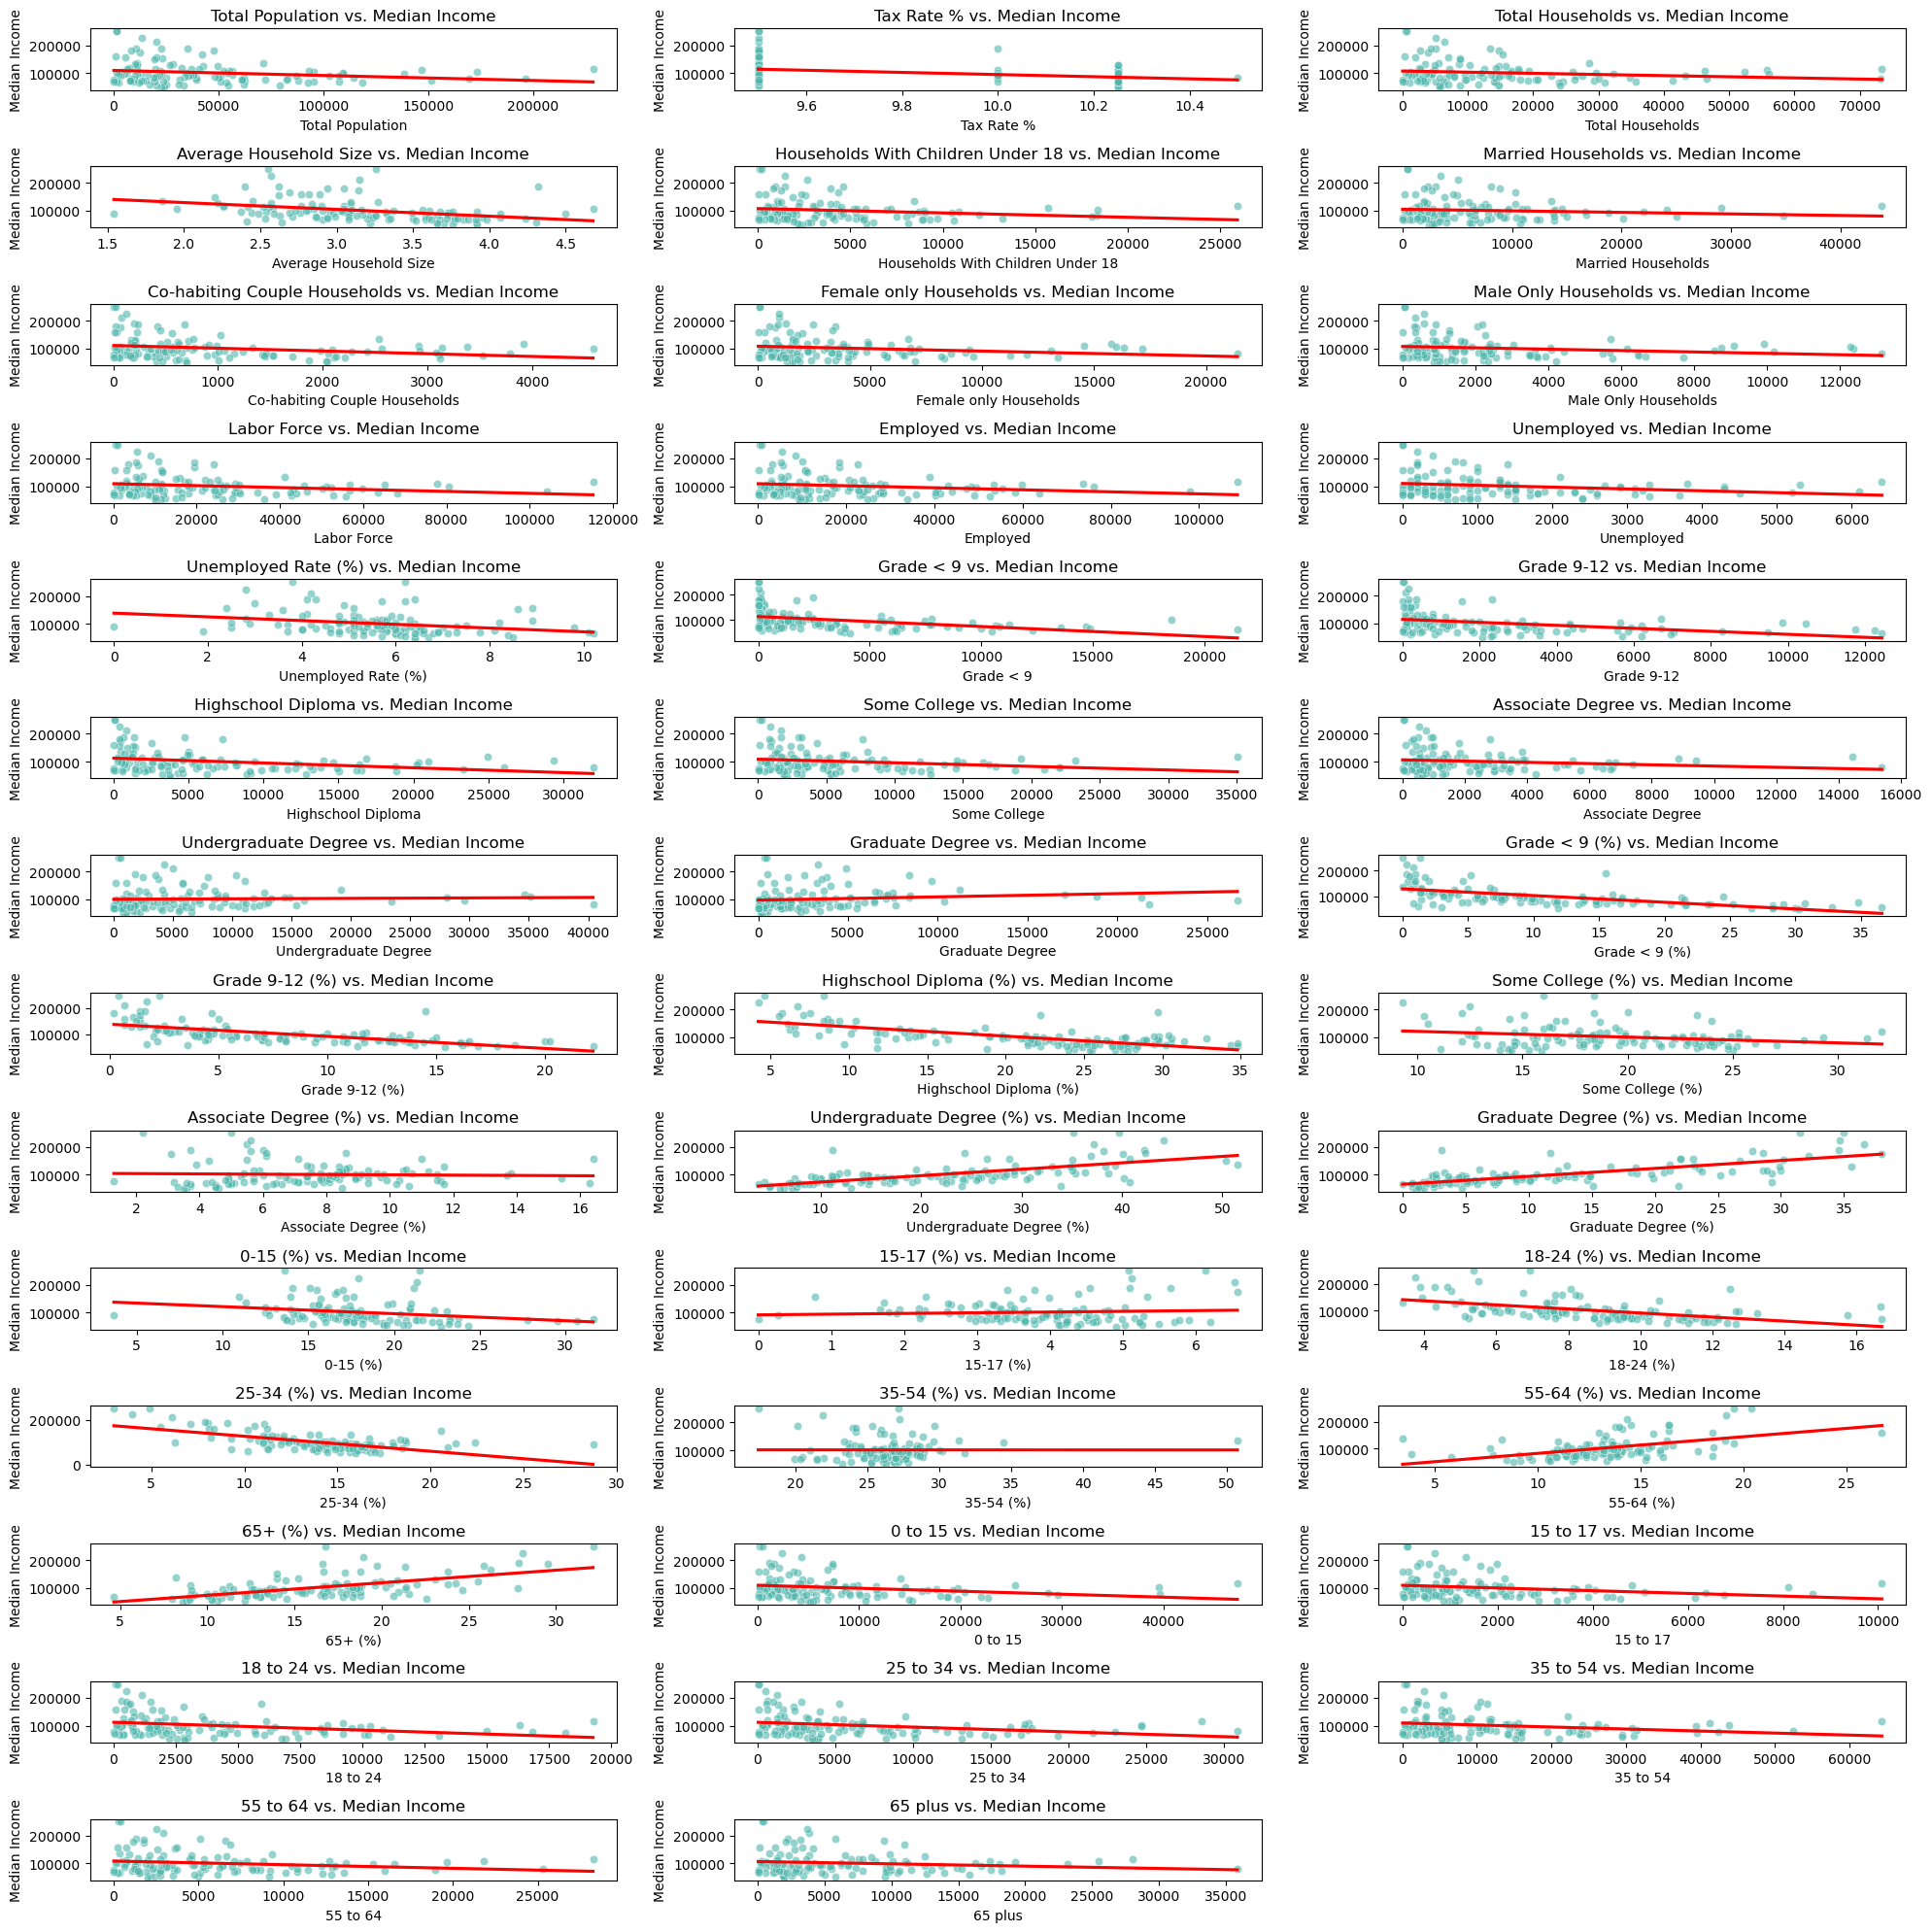

In [97]:

# Drop non-numeric columns like 'City'
data = data.select_dtypes(include=['float64', 'int64'])

# Define target and features
target_var = "Median Income"  # Replace with actual target variable name
independent_vars = data.drop(columns=[target_var]).columns

# Create scatterplots with trendlines
scatter = plt.figure(figsize=(20, 20))
for i, var in enumerate(independent_vars, start=1):
    plt.subplot((len(independent_vars) + 2) // 3, 3, i)  # Adjust grid dynamically
    sns.scatterplot(data=data, x=var, y=target_var, alpha=0.6, color="#4db6ac")  # Change scatter points color
    sns.regplot(data=data, x=var, y=target_var, scatter=False, color='red', ci=None)  # Add trendline
    plt.title(f"{var} vs. {target_var}")
    plt.xlabel(var)
    plt.ylabel(target_var)

plt.tight_layout()
plt.savefig("scatterplots.png", dpi=300)  # Adjust dpi for quality

plt.show()

In [99]:
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm

# Assuming your dataset is ready, define the target and predictors
target_var = "Median Income"  # Replace with your target variable
independent_vars = numeric_data.drop(columns=[target_var])

# Add a constant term for the intercept
X = sm.add_constant(independent_vars)
y = numeric_data[target_var]

# Fit the regression model
model = sm.OLS(y, X).fit()

# Perform the Durbin-Watson test
dw_statistic = durbin_watson(model.resid)

# Display the result
print(f"Durbin-Watson Statistic: {dw_statistic:.4f}")


Durbin-Watson Statistic: 1.5116


In [79]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.linear_model import LinearRegression
# Drop non-numeric columns like 'City'
data = data.select_dtypes(include=['float64', 'int64'])

# Define target and features
target_var = "Median Income"  # Replace with actual target variable name
independent_vars = data.drop(columns=[target_var]).columns

# Create the regression model and perform the Breusch-Pagan test
for var in independent_vars:
    # Fit a simple linear regression model for each feature
    X = data[[var]]
    X = sm.add_constant(X)  # Add constant (intercept) term for regression model
    y = data[target_var]

    model = sm.OLS(y, X).fit()  # Ordinary Least Squares regression

    # Perform the Breusch-Pagan test for heteroscedasticity
    _, p_value, _, _ = het_breuschpagan(model.resid, model.model.exog)

    # Output results
    print(f"Breusch-Pagan Test for {var}: p-value = {p_value}")
    if p_value < 0.05:
        print(f"Heteroscedasticity detected for {var}.")
    else:
        print(f"No heteroscedasticity detected for {var}.")

Breusch-Pagan Test for Total Population: p-value = 0.4577376778495299
No heteroscedasticity detected for Total Population.
Breusch-Pagan Test for Tax Rate %: p-value = 0.0009323767121509241
Heteroscedasticity detected for Tax Rate %.
Breusch-Pagan Test for Total Households: p-value = 0.4620650201641936
No heteroscedasticity detected for Total Households.
Breusch-Pagan Test for Average Household Size: p-value = 0.43078490685172655
No heteroscedasticity detected for Average Household Size.
Breusch-Pagan Test for Households With Children Under 18: p-value = 0.45253677938822257
No heteroscedasticity detected for Households With Children Under 18.
Breusch-Pagan Test for Married Households: p-value = 0.4382176653714487
No heteroscedasticity detected for Married Households.
Breusch-Pagan Test for Co-habiting Couple Households: p-value = 0.49059425893404696
No heteroscedasticity detected for Co-habiting Couple Households.
Breusch-Pagan Test for Female only Households: p-value = 0.4681231760294

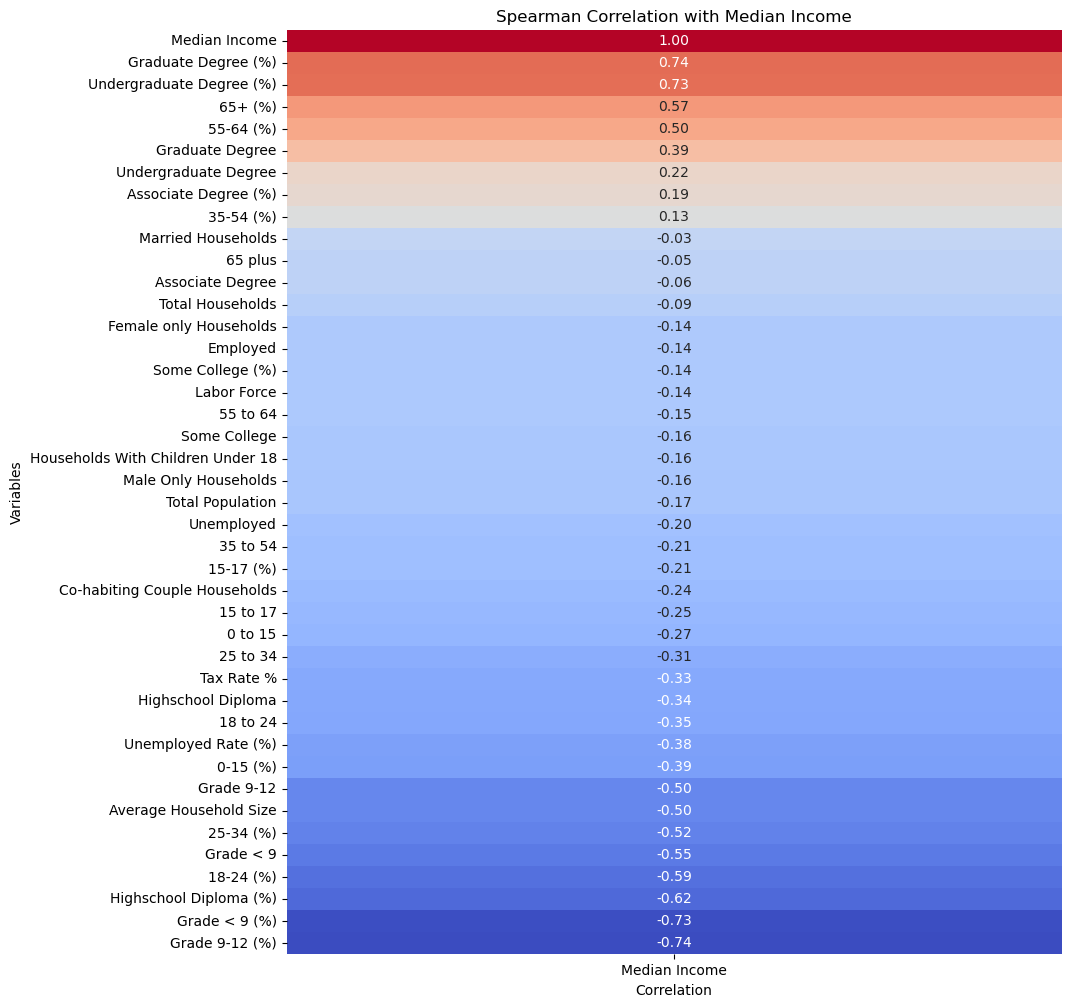

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute Spearman correlation between 'Median Income' and all other numeric variables
target_var = "Median Income"
correlations_with_target = data.corr(method="spearman")[target_var].sort_values(ascending=False)

# Create a heatmap for visualization
plt.figure(figsize=(10, 12))
sns.heatmap(correlations_with_target.to_frame(), annot=True, cmap="coolwarm", cbar=False, fmt=".2f")
plt.title(f"Spearman Correlation with {target_var}")
plt.xlabel("Correlation")
plt.ylabel("Variables")

# Save the figure with adjusted layout to prevent cut-off
plt.savefig("spearman.png", dpi=300, bbox_inches="tight")
plt.show()


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Exclude the target variable from the independent variables
independent_vars = numeric_data.drop(columns=[target_var])

# Compute VIF for each independent variable
vif_data = pd.DataFrame({
    "Variable": independent_vars.columns,
    "VIF": [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]
})

# Sort the results by VIF in descending order
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
vif_data_sorted


C:\Users\pminh\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
2,Total Households,inf
5,Married Households,inf
6,Co-habiting Couple Households,inf
7,Female only Households,inf
8,Male Only Households,inf
9,Labor Force,5.494187e+05
10,Employed,4.880804e+05
31,35-54 (%),1.937230e+05
25,Undergraduate Degree (%),1.660913e+05
22,Highschool Diploma (%),1.320189e+05


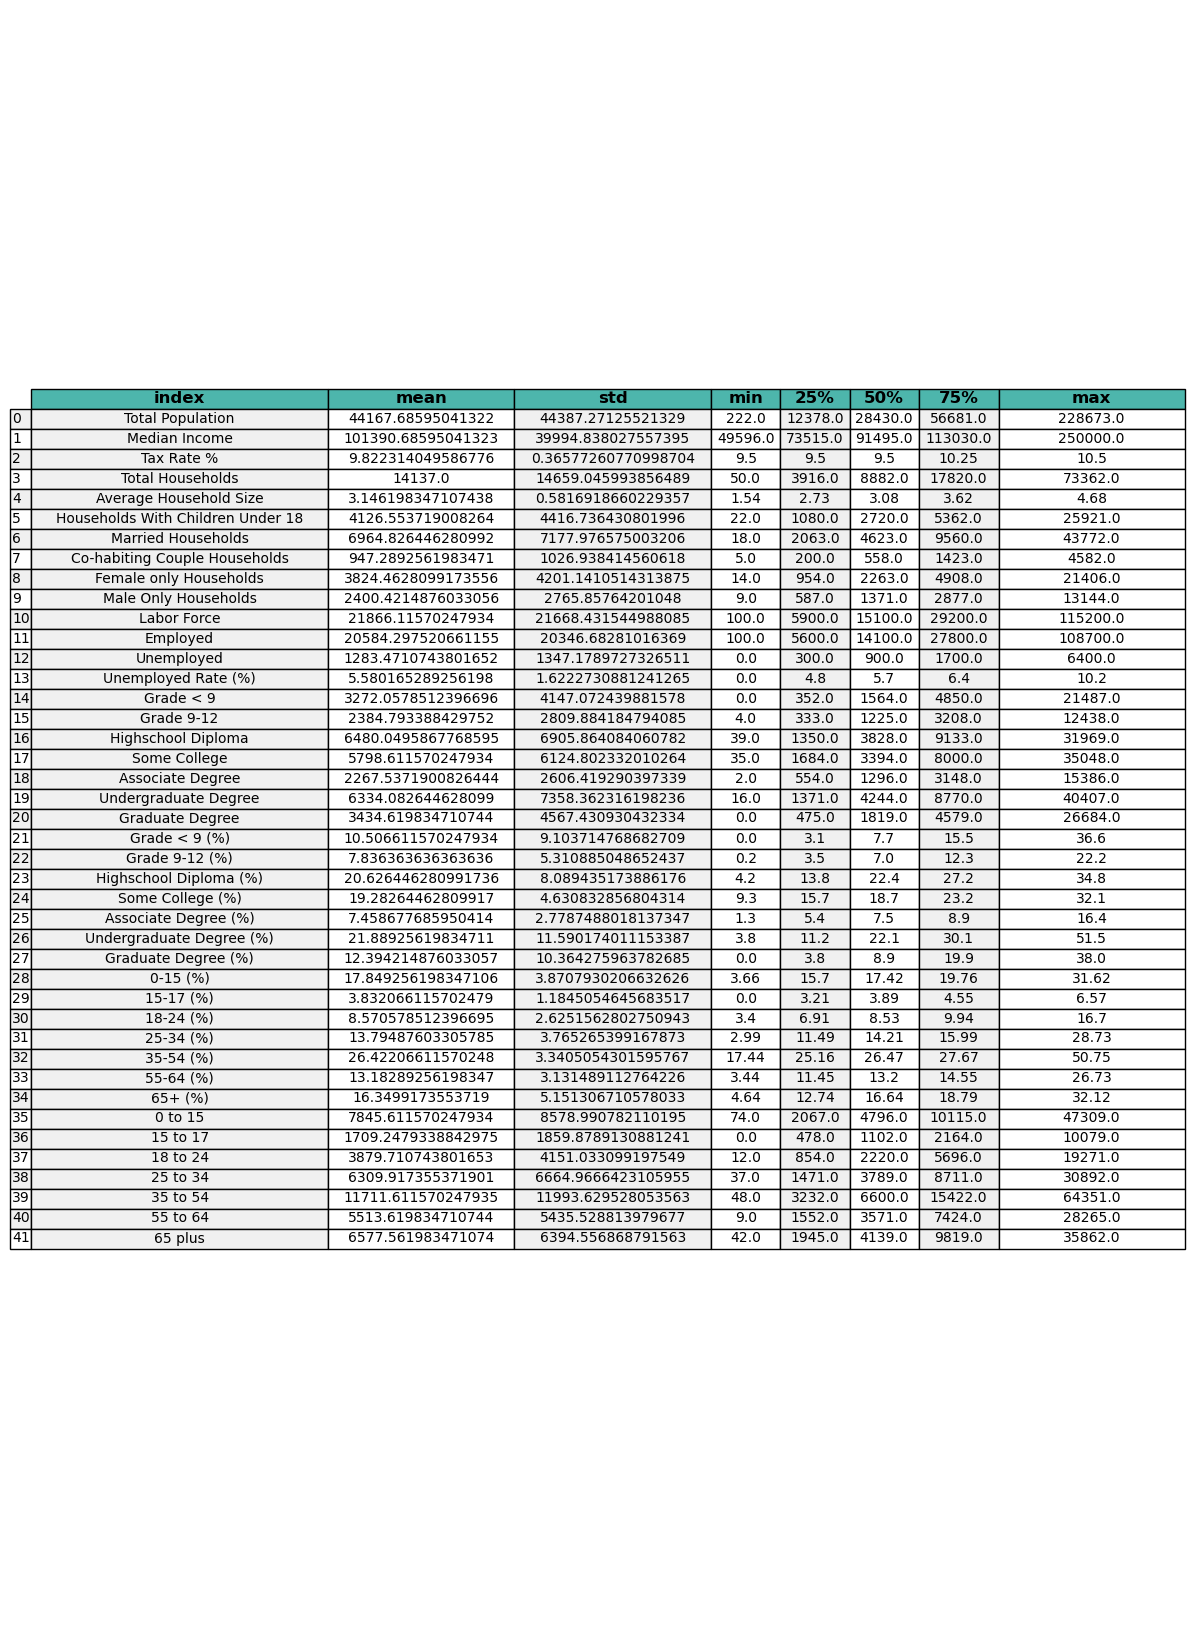

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Assuming `data` is your dataset
summary_table = data.describe().T.reset_index()  # Get summary stats
summary_table = summary_table.drop(columns=['count'])  # Drop the "count" column

# Create a plot to hold the table
fig, ax = plt.subplots(figsize=(10, len(summary_table) * 0.5))  # Adjust size for clarity
ax.axis("off")  # Remove the axis

# Add the table to the plot
tbl = table(ax, summary_table, loc="center", cellLoc="center", colWidths=[0.2] * len(summary_table.columns))

# Style the table
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)  # Adjust font size
tbl.scale(1.2, 1.2)  # Scale for better readability

# Color the table
tbl.auto_set_column_width([0, 1, 2, 3, 4, 5, 6])  # Adjust column width
for i, key in enumerate(tbl.get_celld().keys()):
    cell = tbl.get_celld()[key]
    if key[0] == 0:  # First row (header)
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold')  # Make the header bold
        cell.set_facecolor('#4db6ac')  # Set header color (hex #4db6ac)
    else:
        cell.set_fontsize(10)
        cell.set_facecolor('#f0f0f0' if i % 2 == 0 else 'white')  # Alternate row colors for readability

# Save the table as an image
plt.savefig("styled_summary_table.png", dpi=300, bbox_inches="tight")
plt.show()


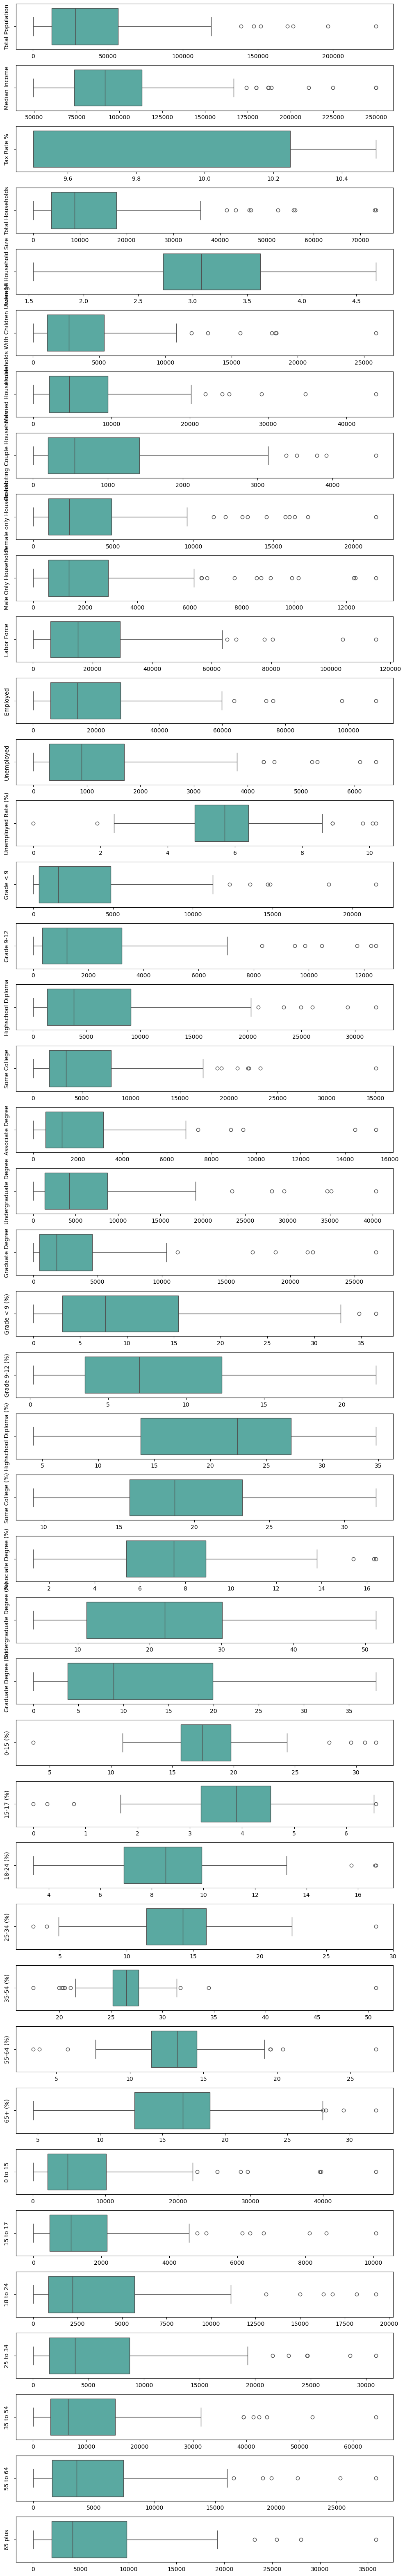

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size and layout dynamically based on the number of columns
plt.figure(figsize=(10, len(data.columns) * 1.5))  # Adjust height based on number of variables

# Loop through each variable to create horizontal boxplots
for i, col in enumerate(data.columns, start=1):
    plt.subplot(len(data.columns), 1, i)  # Create one subplot per variable
    sns.boxplot(data=data, x=col, color="#4db6ac")  # Use the specified color
    plt.ylabel(col)  # Set the variable name as y-axis label
    plt.xlabel("")  # Remove the x-axis label to avoid redundancy

plt.tight_layout()  # Ensure no overlap between plots

# Save the boxplots as an image (optional)
plt.savefig("horizontal_boxplots_cleaned.png", dpi=300, bbox_inches="tight")
plt.show()


In [11]:
data = pd.read_csv(r"C:\Users\pminh\OneDrive\Documents\Classes\Fall 24\STA160 DATA\merged_output.csv")

import pandas as pd
from scipy.stats import spearmanr

# Columns representing education levels
education_columns = [
    "Grade 9-12 (%)",
    "Grade < 9 (%)",
    "Highschool Diploma (%)",
    "Some College (%)",
    "Associate Degree (%)",
    "Undergraduate Degree (%)",
    "Graduate Degree (%)"
]

# Ensure the specified columns exist in the dataset
missing_columns = [col for col in education_columns if col not in data.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing from the dataset: {missing_columns}")

# Subset the data for the education columns
education_data = data[education_columns]

# Compute the Spearman correlation matrix
correlation_matrix = education_data.corr(method='spearman')

# Display the correlation matrix
print("Spearman Correlation Matrix:")
print(correlation_matrix)

Spearman Correlation Matrix:
                          Grade 9-12 (%)  Grade < 9 (%)  \
Grade 9-12 (%)                  1.000000       0.898679   
Grade < 9 (%)                   0.898679       1.000000   
Highschool Diploma (%)          0.816767       0.754776   
Some College (%)                0.164912       0.008648   
Associate Degree (%)           -0.295182      -0.336199   
Undergraduate Degree (%)       -0.922156      -0.876428   
Graduate Degree (%)            -0.917714      -0.875911   

                          Highschool Diploma (%)  Some College (%)  \
Grade 9-12 (%)                          0.816767          0.164912   
Grade < 9 (%)                           0.754776          0.008648   
Highschool Diploma (%)                  1.000000          0.380036   
Some College (%)                        0.380036          1.000000   
Associate Degree (%)                   -0.074404          0.461129   
Undergraduate Degree (%)               -0.878009         -0.302696   
Graduate

In [9]:
data.columns

Index(['City', 'Total Population', 'Median Income', 'Tax Rate %',
       'Total Households', 'Average Household Size',
       'Households With Children Under 18', 'Married Households',
       'Co-habiting Couple Households', 'Female only Households',
       'Male Only Households', 'Labor Force', 'Employed', 'Unemployed',
       'Unemployed Rate (%)', 'Grade < 9', 'Grade 9-12', 'Highschool Diploma',
       'Some College', 'Associate Degree', 'Undergraduate Degree',
       'Graduate Degree', 'Grade < 9 (%)', 'Grade 9-12 (%)',
       'Highschool Diploma (%)', 'Some College (%)', 'Associate Degree (%)',
       'Undergraduate Degree (%)', 'Graduate Degree (%)', '0-15 (%)',
       '15-17 (%)', '18-24 (%)', '25-34 (%)', '35-54 (%)', '55-64 (%)',
       '65+ (%)', '0 to 15', '15 to 17', '18 to 24', '25 to 34', '35 to 54',
       '55 to 64', '65 plus'],
      dtype='object')

In [13]:

import pandas as pd
from scipy.stats import spearmanr

# Columns representing education levels
education_columns = [
    "0-15 (%)",
    "15-17 (%)",
    "18-24 (%)",
    "25-34 (%)",
    "55-64 (%)",
    "65+ (%)"
]

# Ensure the specified columns exist in the dataset
missing_columns = [col for col in education_columns if col not in data.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing from the dataset: {missing_columns}")

# Subset the data for the education columns
education_data = data[education_columns]

# Compute the Spearman correlation matrix
correlation_matrix = education_data.corr(method='spearman')

# Display the correlation matrix
print("Spearman Correlation Matrix:")
print(correlation_matrix)

Spearman Correlation Matrix:
           0-15 (%)  15-17 (%)  18-24 (%)  25-34 (%)  55-64 (%)   65+ (%)
0-15 (%)   1.000000   0.392483   0.366859   0.112121  -0.482641 -0.677332
15-17 (%)  0.392483   1.000000   0.243743  -0.125126  -0.100161 -0.268109
18-24 (%)  0.366859   0.243743   1.000000   0.274273  -0.564928 -0.646470
25-34 (%)  0.112121  -0.125126   0.274273   1.000000  -0.576043 -0.521512
55-64 (%) -0.482641  -0.100161  -0.564928  -0.576043   1.000000  0.596598
65+ (%)   -0.677332  -0.268109  -0.646470  -0.521512   0.596598  1.000000
